In [1]:


# System imports
import sys
import os

# Add the parent directory of 'notebooks' to sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Move one level up
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Class/model imports
from data.data_loader import MirDataProcessor
from utils.model_utils import get_device
from solver import Solver

# Package imports
import torch
import torch.optim as optim
import torch.nn as nn

# Select device
device = get_device()
print(f"Device is {device}")

c:\Users\mattb\miniconda3\envs\amadeus-ex-machina\Lib\site-packages\tqdm_joblib\__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Device is cuda


In [25]:
# Download and build useable train/test data out of the MIR Billboard dataset
data_processer = MirDataProcessor(download=True, batch_size=64, dataset_name="guitarset")


INFO: Downloading ['annotations', 'audio_hex_debleeded', 'audio_hex_original', 'audio_mic', 'audio_mix', 'index']. Index is being stored in C:\Users\mattb\miniconda3\envs\amadeus-ex-machina\Lib\site-packages\mirdata\datasets\indexes, and the rest of files in c:\Users\mattb\Documents\CS7643\Final Project\amadeus-ex-machina\data\raw
INFO: [annotations] downloading annotation.zip
37.3MB [00:02, 14.5MB/s]                              
INFO: [audio_hex_debleeded] downloading audio_hex-pickup_debleeded.zip
3.36GB [02:29, 24.1MB/s]                               
INFO: [audio_hex_original] downloading audio_hex-pickup_original.zip
2.99GB [01:57, 27.2MB/s]                               
INFO: [audio_mic] downloading audio_mono-mic.zip
626MB [00:25, 25.8MB/s]                               
INFO: [audio_mix] downloading audio_mono-pickup_mix.zip
652MB [00:33, 20.4MB/s]                               
INFO: [index] downloading guitarset_index_1.1.0.json
248kB [00:00, 372kB/s]                       

In [73]:
%load_ext autoreload

%autoreload 2

from data.data_loader import MirDataProcessor
data_processer = MirDataProcessor(download=False, batch_size=64, dataset_name="guitarset", process_sequential=True, seq_length=4096)

data_processer.process_wav_data(20)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Found 360 tracks in the dataset.
Processing dataset as sequential data
Processed track 00_BN1-129-Eb_comp and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN1-129-Eb_solo and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN1-147-Gb_comp and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN1-147-Gb_solo and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN2-131-B_comp and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN2-131-B_solo and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN2-166-Ab_comp and appended data to combined CSV.
Processing dataset as sequential data
Processed track 00_BN2-166-Ab_solo and appended data to combined CSV.
Processing datase

In [74]:
# Create data loeaders for train and test set
train_loader, test_loader, num_classes = data_processer.build_data_loaders(None, device)

print(f"Number of classes: {num_classes}")

Preparing model data...
Loading the combined CSV file...
Separating song IDs, features, and labels...
Scaling features using MinMaxScaler...
Encoding labels using LabelEncoder...
Saving the scaler to c:\Users\mattb\Documents\CS7643\Final Project\amadeus-ex-machina\data\processed\scaler.pkl...
Saving the label encoder to c:\Users\mattb\Documents\CS7643\Final Project\amadeus-ex-machina\data\processed\label_encoder.pkl...
Creating sequences of chromagram data within song boundaries...
Splitting data into training and testing sets...
Data preparation complete.
Number of classes determined: 30
Creating TensorDatasets for training and testing data...
Creating DataLoaders for training and testing datasets...
Data loaders are ready for training and testing.
Number of classes: 30


-----------------------------------
Epoch 1
-----------------------------------


Training:   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 3.4324. Validation Loss: 3.4206.
Training Accuracy: 0.0653. Validation Accuracy: 0.0836.
-----------------------------------
Epoch 2
-----------------------------------


Training:   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 3.4231. Validation Loss: 3.4050.
Training Accuracy: 0.0657. Validation Accuracy: 0.0836.
-----------------------------------
Epoch 3
-----------------------------------


Training:   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 3.4044. Validation Loss: 3.3897.
Training Accuracy: 0.0689. Validation Accuracy: 0.0836.
-----------------------------------
Epoch 4
-----------------------------------


Training:   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 3.3880. Validation Loss: 3.3751.
Training Accuracy: 0.0719. Validation Accuracy: 0.0836.
-----------------------------------
Epoch 5
-----------------------------------


Training:   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 3.3754. Validation Loss: 3.3612.
Training Accuracy: 0.0735. Validation Accuracy: 0.0845.
-----------------------------------
Epoch 6
-----------------------------------


Training:   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 3.3578. Validation Loss: 3.3476.
Training Accuracy: 0.0729. Validation Accuracy: 0.0836.
-----------------------------------
Epoch 7
-----------------------------------


Training:   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 3.3404. Validation Loss: 3.3345.
Training Accuracy: 0.0769. Validation Accuracy: 0.0836.
-----------------------------------
Epoch 8
-----------------------------------


Training:   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 3.3263. Validation Loss: 3.3219.
Training Accuracy: 0.0807. Validation Accuracy: 0.0836.
-----------------------------------
Epoch 9
-----------------------------------


Training:   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 3.3106. Validation Loss: 3.3096.
Training Accuracy: 0.0809. Validation Accuracy: 0.0836.
-----------------------------------
Epoch 10
-----------------------------------


Training:   0%|          | 0/2 [00:00<?, ?it/s]

Training Loss: 3.2961. Validation Loss: 3.2978.
Training Accuracy: 0.0828. Validation Accuracy: 0.0836.


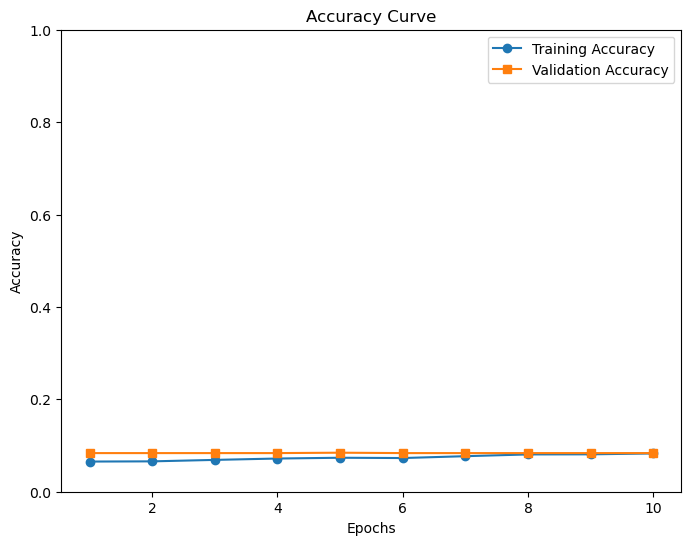

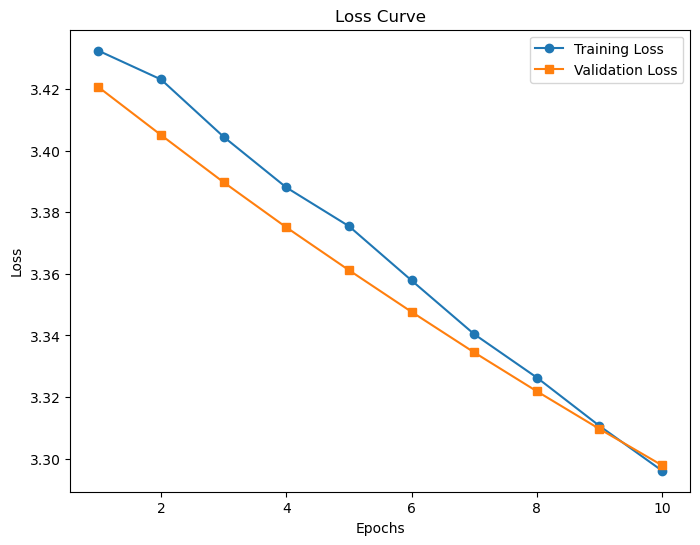

In [75]:
from models.FourierS2S import FourierS2S

model = FourierS2S(512, 512, 512, 64, 64, num_classes, 4096, device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3)


# Initialize Solver for CRNNModel
fourierS2S_solver = Solver(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    scheduler=scheduler,
    train_dataloader=train_loader,
    valid_dataloader=test_loader,
    batch_size=4096,
    epochs=10,
    device=device,
    early_stop_epochs=3,
    warmup_epochs=2,
    optuna_prune=False
)
fourierS2S_solver.train_and_evaluate(plot_results=True)